In [101]:
!pip install mysql-connector-python

In [102]:
import mysql.connector

In [103]:
import pandas as pd
con=mysql.connector.connect(
    host="localhost",
    port=3306,
    user="root",
    password="Bunnyvasi@44",
    database="student")

#https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.read_sql_query.html


df=pd.read_sql_query("Select * from student",con)
df

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,05-04-1988,55,45,56,87,21,52,89,65
1,Suresh,M,04-05-1987,75,96,78,64,90,61,58,2
2,Ramesh,M,25-05-1989,25,54,89,76,95,87,56,74
3,Jessica,F,12-08-1990,78,96,86,63,54,89,75,45
4,Jennifer,F,02-09-1989,58,96,78,46,96,77,83,53
5,Annu,F,05-04-1988,45,87,52,89,55,89,87,52
6,pooja,F,04-05-1987,55,64,61,58,75,58,64,61
7,Ritesh,M,25-05-1989,54,76,87,56,25,56,76,87
8,Farha,F,12-08-1990,55,63,89,75,78,75,63,89
9,Mukesh,M,02-09-1989,96,46,77,83,58,83,46,77


In [104]:
df.shape

(10, 11)

In [105]:
df.columns

Index(['Name', 'Gender', 'DOB', 'Maths', 'Physics', 'Chemistry', 'English',
       'Biology', 'Economics', 'History', 'Civics'],
      dtype='object')

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       10 non-null     object
 1   Gender     10 non-null     object
 2   DOB        10 non-null     object
 3   Maths      10 non-null     int64 
 4   Physics    10 non-null     int64 
 5   Chemistry  10 non-null     int64 
 6   English    10 non-null     int64 
 7   Biology    10 non-null     int64 
 8   Economics  10 non-null     int64 
 9   History    10 non-null     int64 
 10  Civics     10 non-null     int64 
dtypes: int64(8), object(3)
memory usage: 1008.0+ bytes


In [107]:
df.describe()

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000


OBSERVATIONS

-> HERE MEAN IS GREATER DIFFERANCE TO MEDIAN IN MATHS,PHYSICS,BIOLOGY,AND CIVICS BUT THERE ARE NO OUTLIERS PRESENT IN IT

In [108]:
df.isnull().sum()

Name         0
Gender       0
DOB          0
Maths        0
Physics      0
Chemistry    0
English      0
Biology      0
Economics    0
History      0
Civics       0
dtype: int64

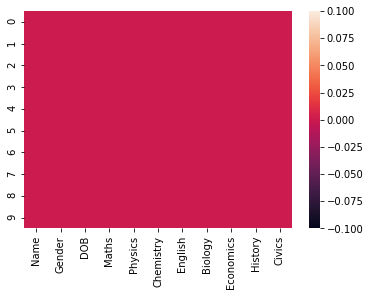

In [109]:
# to check the null values
import seaborn as sns
sns.heatmap(df.isnull())

THERE ARE NO ISNULL VALUES

In [110]:
#Lets check the correlation
df_cor=df.corr()
df_cor

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
Maths,1.000000,0.113354,0.076751,-0.064074,-0.146598,0.000312,-0.320846,-0.274629
Physics,0.113354,1.000000,0.117192,-0.562608,0.279638,0.191851,0.334082,-0.643266
Chemistry,0.076751,0.117192,1.000000,-0.409680,0.318032,0.235390,-0.482710,0.210908
English,-0.064074,-0.562608,-0.409680,1.000000,-0.330844,0.237577,-0.038775,0.186705
Biology,-0.146598,0.279638,0.318032,-0.330844,1.000000,0.370531,-0.456131,-0.330060
Economics,0.000312,0.191851,0.235390,0.237577,0.370531,1.000000,-0.164953,0.043905
History,-0.320846,0.334082,-0.482710,-0.038775,-0.456131,-0.164953,1.000000,-0.048686
Civics,-0.274629,-0.643266,0.210908,0.186705,-0.330060,0.043905,-0.048686,1.000000


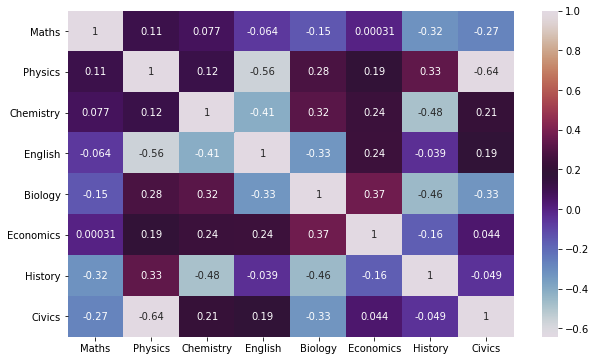

In [111]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
sns.heatmap(df_cor,cmap='twilight',annot=True)

WHITE SHADES ARE HIGHLY CORRELATED
IN THESE CIVICS IS HIGHLY CORRELATED TO HISTORY
WHERE AS CIVICS IS NEGATIVELY CORRELATED TO PHYSICS

In [112]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [113]:
label=le.fit_transform(df['Gender'])
label

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1])

In [114]:
le.classes_

array(['F', 'M'], dtype=object)

In [115]:
df.drop('Gender',axis='columns')

,Name,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,05-04-1988,55,45,56,87,21,52,89,65
1,Suresh,04-05-1987,75,96,78,64,90,61,58,2
2,Ramesh,25-05-1989,25,54,89,76,95,87,56,74
3,Jessica,12-08-1990,78,96,86,63,54,89,75,45
4,Jennifer,02-09-1989,58,96,78,46,96,77,83,53
5,Annu,05-04-1988,45,87,52,89,55,89,87,52
6,pooja,04-05-1987,55,64,61,58,75,58,64,61
7,Ritesh,25-05-1989,54,76,87,56,25,56,76,87
8,Farha,12-08-1990,55,63,89,75,78,75,63,89
9,Mukesh,02-09-1989,96,46,77,83,58,83,46,77


In [116]:
df['Gender']=label
df.dtypes

Name         object
Gender        int32
DOB          object
Maths         int64
Physics       int64
Chemistry     int64
English       int64
Biology       int64
Economics     int64
History       int64
Civics        int64
dtype: object

In [117]:
#lets take the average marks of all subjects for better explanation
maths_average=df['Maths'].mean()
physics_average=df['Physics'].mean()
chemistry_average=df['Chemistry'].mean()
english_average=df['English'].mean()
biology_average=df['Biology'].mean()
economics_average=df['Economics'].mean()
history_average=df['History'].mean()
civics_average=df['Civics'].mean()
print('maths:',maths_average)
print('physics:',physics_average)
print('chemistry:',chemistry_average)
print('english:',english_average)
print('biology:',biology_average)
print('economics:',economics_average)
print('history:',history_average)
print('civics:',civics_average)

maths: 59.6
physics: 72.3
chemistry: 75.3
english: 69.7
biology: 64.7
economics: 72.7
history: 69.7
civics: 60.5


The average marks in all subjects to score

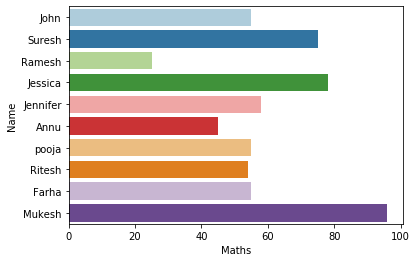

In [118]:
sns.barplot(x='Maths',y='Name',data=df,palette='Paired')

OBSERVATIONS

-> AVERAGE MARKS IN MATHS ARE 59.6 STUDENTS WHO SCORED LESS THE AVEREAGE MARKS CAN BE TAKEN AS BELOW AVERAGE IN MATHS THOSE
WHO ARE SCORED ABOVE AVERAGE MARKS ARE ABOVE AVERAGE IN MATHS
-> IN THESE RAMESH HAS SCORED LESS MARKS IN MATHS

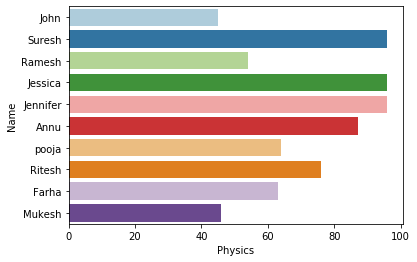

In [119]:
sns.barplot(x='Physics',y='Name',data=df,palette='Paired')

OBSERVATIONS

-> AVERAGE MARKS IN PHYSICS ARE 72.3 STUDENTS WHO SCORED LESS THE AVEREAGE MARKS CAN BE TAKEN AS BELOW AVERAGE IN PHYSICS THOSE
WHO ARE SCORED ABOVE AVERAGE MARKS ARE ABOVE AVERAGE IN PHYSICS
-> IN THESE MUKESH HAS SCORED LESS MARKS IN PHYSICS

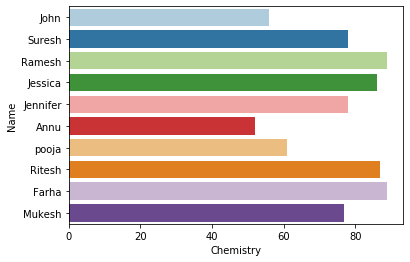

In [120]:
sns.barplot(x='Chemistry',y='Name',data=df,palette='Paired')

OBSERVATIONS

-> AVERAGE MARKS IN CHEMISTRY ARE 75.3 STUDENTS WHO SCORED LESS THE AVEREAGE MARKS CAN BE TAKEN AS BELOW AVERAGE IN CHEMISTRY THOSE
WHO ARE SCORED ABOVE AVERAGE MARKS ARE ABOVE AVERAGE IN CHEMISTRY
-> IN THESE ANNU HAS SCORED LESS MARKS IN CHEMISTRY

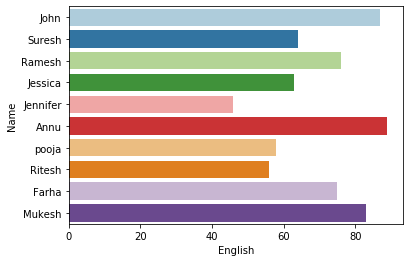

In [121]:
sns.barplot(x='English',y='Name',data=df,palette='Paired')

OBSERVATIONS

-> AVERAGE MARKS IN ENGLISH ARE 69.7 STUDENTS WHO SCORED LESS THE AVEREAGE MARKS CAN BE TAKEN AS BELOW AVERAGE IN ENGLISH THOSE
WHO ARE SCORED ABOVE AVERAGE MARKS ARE ABOVE AVERAGE IN ENGLISH
-> IN THESE JENNIFIER HAS SCORED LESS MARKS IN ENGLISH

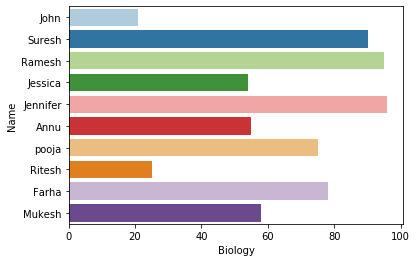

In [122]:
sns.barplot(x='Biology',y='Name',data=df,palette='Paired')

OBSERVATIONS

-> AVERAGE MARKS IN BIOLOGY ARE 64.7 STUDENTS WHO SCORED LESS THE AVEREAGE MARKS CAN BE TAKEN AS BELOW AVERAGE IN BIOLOGY THOSE
WHO ARE SCORED ABOVE AVERAGE MARKS ARE ABOVE AVERAGE IN BIOLOGY
-> IN THESE RITESH HAS SCORED LESS MARKS IN BIOLOGY

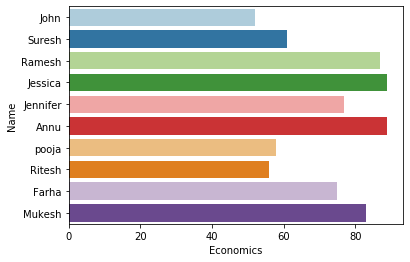

In [123]:
sns.barplot(x='Economics',y='Name',data=df,palette='Paired')

OBSERVATIONS

-> AVERAGE MARKS IN MATHS ARE 59.6 STUDENTS WHO SCORED LESS THE AVEREAGE MARKS CAN BE TAKEN AS BELOW AVERAGE IN MATHS THOSE
WHO ARE SCORED ABOVE AVERAGE MARKS ARE ABOVE AVERAGE IN MATHS
-> IN THESE RAMESH HAS SCORED LESS MARKS IN MATHS

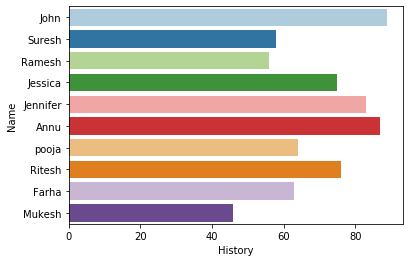

In [124]:
sns.barplot(x='History',y='Name',data=df,palette='Paired')

OBSERVATIONS

-> AVERAGE MARKS IN HISTORY ARE 72.7 STUDENTS WHO SCORED LESS THE AVEREAGE MARKS CAN BE TAKEN AS BELOW AVERAGE IN HISTORY THOSE
WHO ARE SCORED ABOVE AVERAGE MARKS ARE ABOVE AVERAGE IN HISTORY
-> IN THESE MUKESH HAS SCORED LESS MARKS IN HISTORY

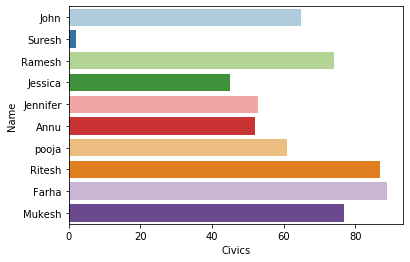

In [125]:
sns.barplot(x='Civics',y='Name',data=df,palette='Paired')

OBSERVATIONS

-> AVERAGE MARKS IN CIVICS ARE 60.7 STUDENTS WHO SCORED LESS THE AVEREAGE MARKS CAN BE TAKEN AS BELOW AVERAGE IN CIVICS THOSE
WHO ARE SCORED ABOVE AVERAGE MARKS ARE ABOVE AVERAGE IN CIVICS
-> IN THESE SURESH HAS SCORED LESS MARKS IN CIVICS

In [126]:
df['Total']=df['Maths']+df['Physics']+df['Chemistry']+df['English']+df['Biology']+df['Economics']+df['History']+df['Civics']

In [127]:
df['Average']=df['Total']/8

In [128]:
#Average of each students score in each subjects

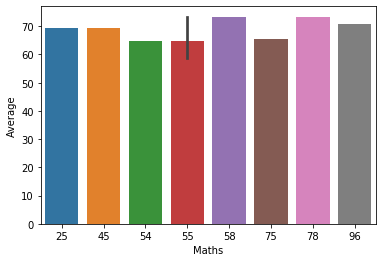

In [129]:
sns.barplot(df['Maths'],df['Average'])

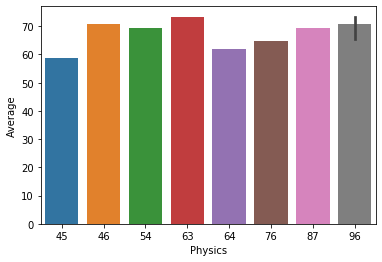

In [130]:
sns.barplot(df['Physics'],df['Average'])

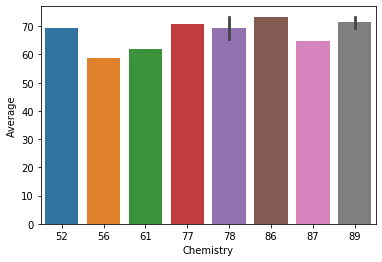

In [131]:
sns.barplot(df['Chemistry'],df['Average'])

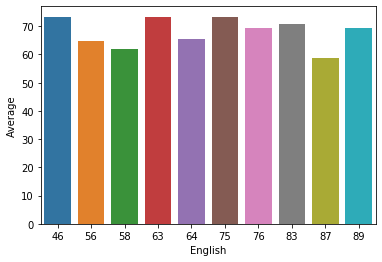

In [132]:
sns.barplot(df['English'],df['Average'])

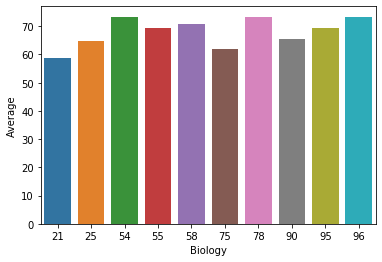

In [133]:
sns.barplot(df['Biology'],df['Average'])

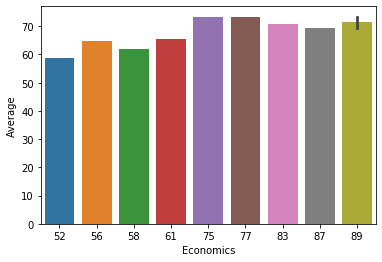

In [134]:
sns.barplot(df['Economics'],df['Average'])

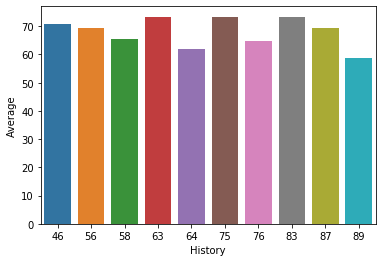

In [135]:
sns.barplot(df['History'],df['Average'])

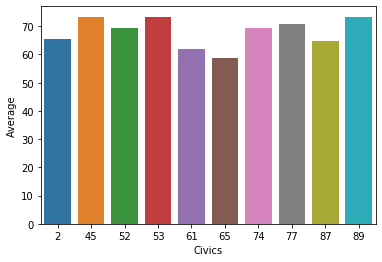

In [136]:
sns.barplot(df['Civics'],df['Average'])

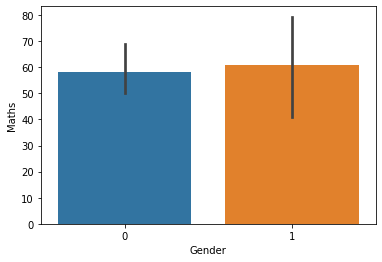

In [137]:
sns.barplot(x=df['Gender'],y=df['Maths'],data=df)

In [138]:
# highest score secured in maths by male students

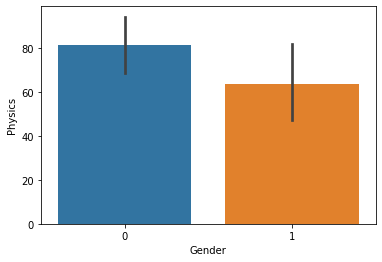

In [139]:
sns.barplot(x=df['Gender'],y=df['Physics'],data=df)

In [140]:
# highest score secured in physics are female students

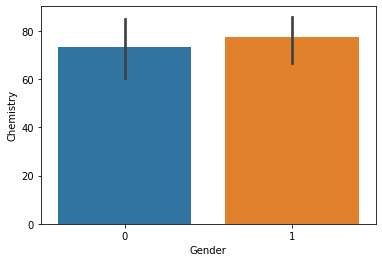

In [141]:
sns.barplot(x=df['Gender'],y=df['Chemistry'],data=df)

In [142]:
# highest score secured in chemistry are male students

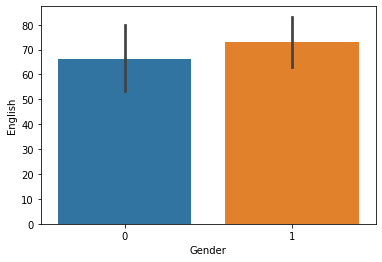

In [143]:
sns.barplot(x=df['Gender'],y=df['English'],data=df)

In [144]:
# highest score secured by male students in english

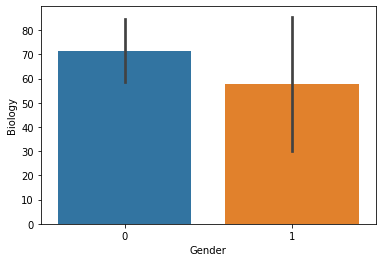

In [145]:
sns.barplot(x=df['Gender'],y=df['Biology'],data=df)

In [146]:
# highest scored secured in biology by female students

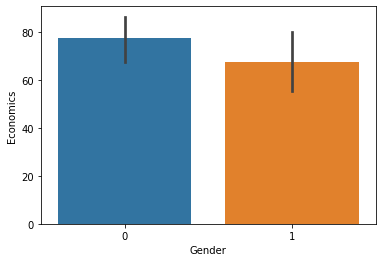

In [147]:
sns.barplot(x=df['Gender'],y=df['Economics'],data=df)

In [148]:
# highest scored secured in economics by female students

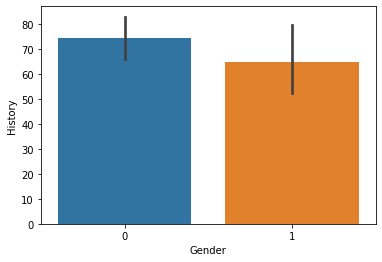

In [149]:
sns.barplot(x=df['Gender'],y=df['History'],data=df)

In [150]:
# highest scored secured in history by female students

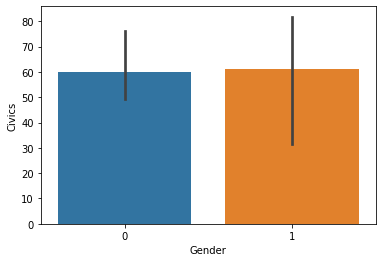

In [151]:
sns.barplot(x=df['Gender'],y=df['Civics'],data=df)

In [152]:
# highest scored secured in civics by male students

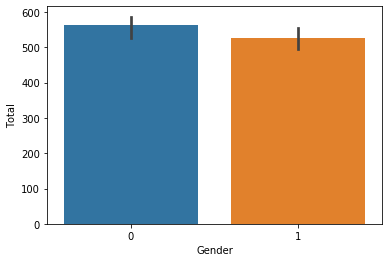

In [153]:
sns.barplot(x=df['Gender'],y=df['Total'],data=df)

In [154]:
# average scores in all subjects scored higher by female students

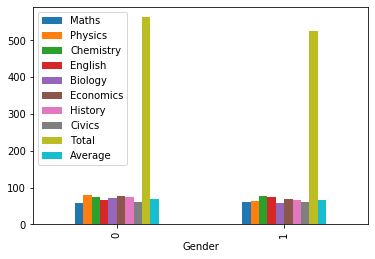

In [155]:
df.groupby('Gender').mean().plot(kind='bar')

In [156]:
df_john_val=df.iloc[:1,3:-2]
df_suresh_val=df.iloc[1:2,3:-2]
df_ramesh_val=df.iloc[2:3,3:-2]
df_jessica_val=df.iloc[3:4,3:-2]
df_jennifer_val=df.iloc[4:5,3:-2]
df_annu_val=df.iloc[5:6,3:-2]
df_pooja_val=df.iloc[6:7,3:-2]
df_ritesh_val=df.iloc[7:8,3:-2]
df_farha_val=df.iloc[8:9,3:-2]
df_mukesh_val=df.iloc[9:10,3:-2]
df_label=['Maths','Physics','Chemistry','English','Biology','Economics','History','Civics']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


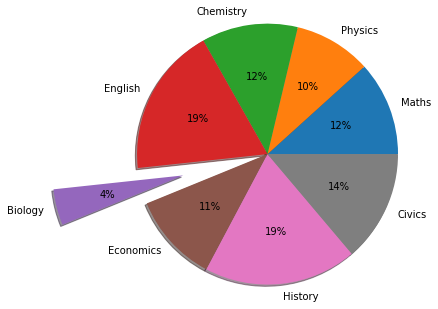

In [157]:
plt.pie(df_john_val,labels=df_label,radius=1.5,autopct='%0.0f%%',shadow=True,explode=[0,0,0,0,1,0,0,0])
plt.show()

             JOHN TOTAL SCORE PERCENTAGE IN ALL SUBJECTS

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


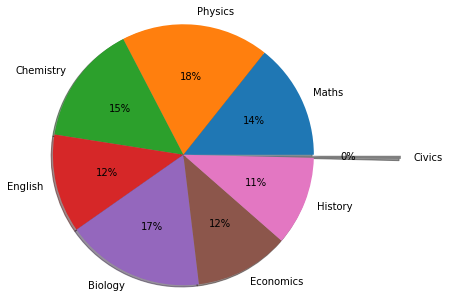

In [158]:
plt.pie(df_suresh_val,labels=df_label,radius=1.5,autopct='%0.0f%%',shadow=True,explode=[0,0,0,0,0,0,0,1])
plt.show()

SURESH TOTAL SCORE PERCENTAGE IN ALL SUBJECTS AND I SEPERATED LOWER PERCENTAGE SUBJECT

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


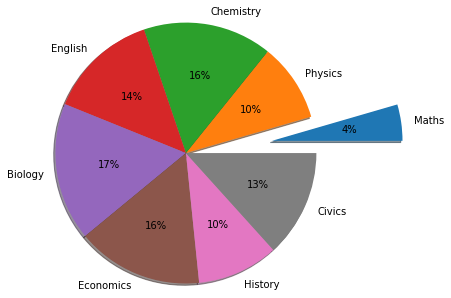

In [159]:
plt.pie(df_ramesh_val,labels=df_label,radius=1.5,autopct='%0.0f%%',shadow=True,explode=[1,0,0,0,0,0,0,0])
plt.show()

RAMESH TOTAL SCORE PERCENTAGE IN EACH SUBJECT

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


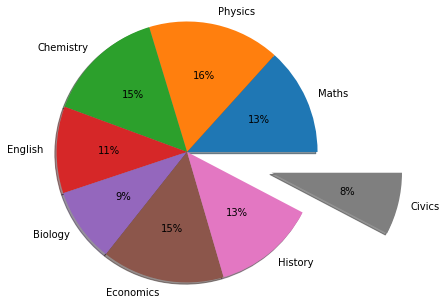

In [160]:
plt.pie(df_jessica_val,labels=df_label,radius=1.5,autopct='%0.0f%%',shadow=True,explode=[0,0,0,0,0,0,0,1])
plt.show()

JESSICA TOTAL SCORE PERCENTAGE IN EACH SUBJECT

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


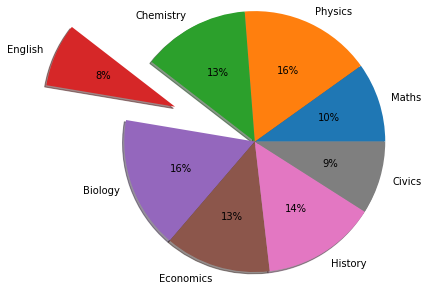

In [161]:
plt.pie(df_jennifer_val,labels=df_label,radius=1.5,autopct='%0.0f%%',shadow=True,explode=[0,0,0,1,0,0,0,0])
plt.show()

JENNIFER TOTAL SCORE PERCENTAGE IN EACH SUBJECT

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


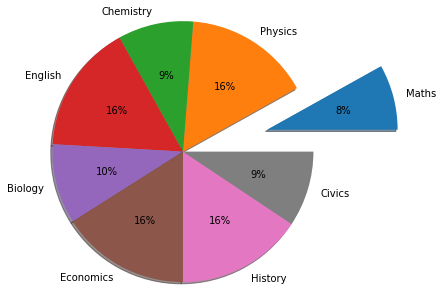

In [162]:
plt.pie(df_annu_val,labels=df_label,radius=1.5,autopct='%0.0f%%',shadow=True,explode=[1,0,0,0,0,0,0,0])
plt.show()

ANNU TOTAL SCORE PERCENTAGE IN EACH SUBJECT

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


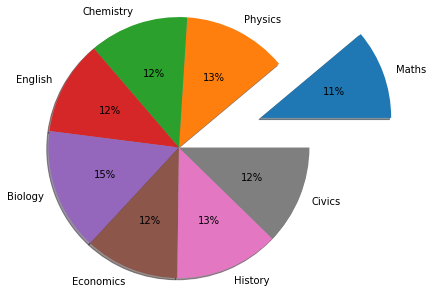

In [163]:
plt.pie(df_pooja_val,labels=df_label,radius=1.5,autopct='%0.0f%%',shadow=True,explode=[1,0,0,0,0,0,0,0])
plt.show()

POOJA TOTAL SCORE PERCENTAGE IN EACH SUBJECT

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


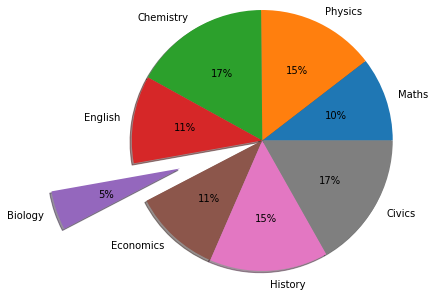

In [164]:
plt.pie(df_ritesh_val,labels=df_label,radius=1.5,autopct='%0.0f%%',shadow=True,explode=[0,0,0,0,1,0,0,0])
plt.show()

RITESH TOTAL SCORE PERCENTAGE IN EACH SUBJECT

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


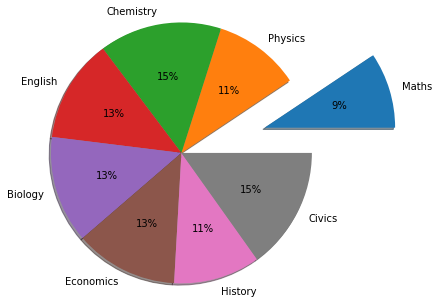

In [165]:
plt.pie(df_farha_val,labels=df_label,radius=1.5,autopct='%0.0f%%',shadow=True,explode=[1,0,0,0,0,0,0,0])
plt.show()

FARHA TOTAL SCORE PERCENTAGE IN EACH SUBJECT

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


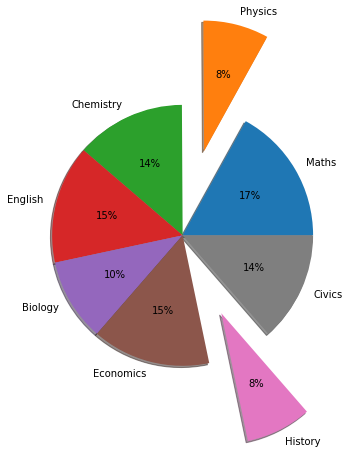

In [166]:
plt.pie(df_mukesh_val,labels=df_label,radius=1.5,autopct='%0.0f%%',shadow=True,explode=[0,1,0,0,0,0,1,0])
plt.show()

MUKESH TOTAL SCORE PERCENTAGE IN EACH SUBJECT

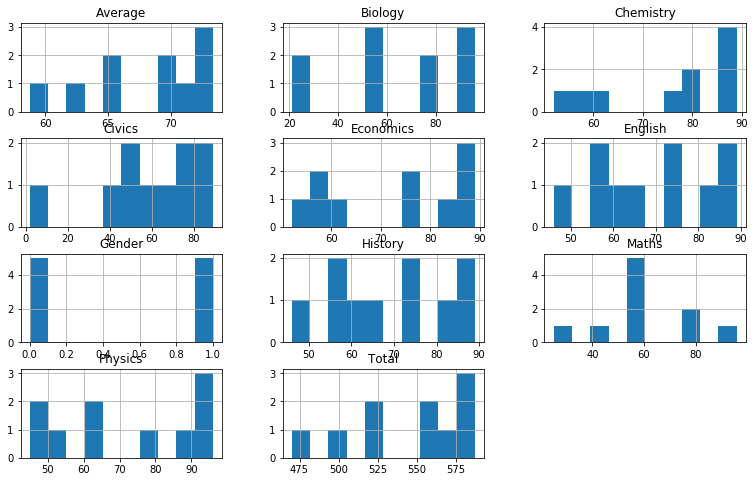

In [167]:
df.hist(figsize=(13,8))
plt.show()

# TO DETECT THE OUTLIERS

In [168]:
df.shape

(10, 13)

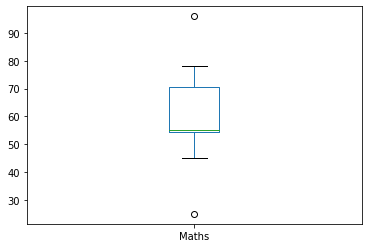

In [169]:
df['Maths'].plot.box()

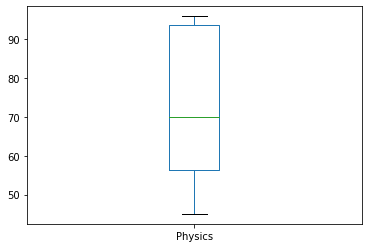

In [170]:
df['Physics'].plot.box()

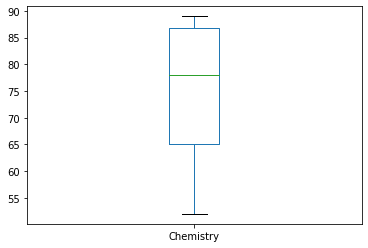

In [171]:
df['Chemistry'].plot.box()

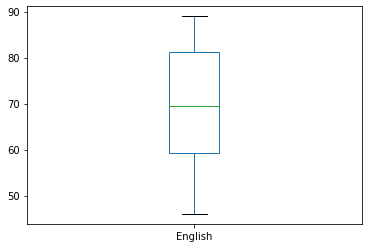

In [172]:
df['English'].plot.box()

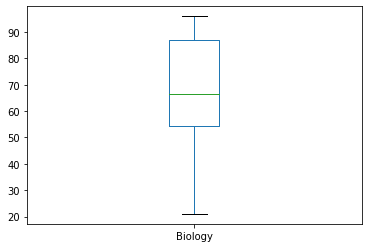

In [173]:
df['Biology'].plot.box()

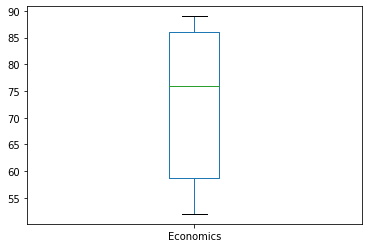

In [174]:
df['Economics'].plot.box()

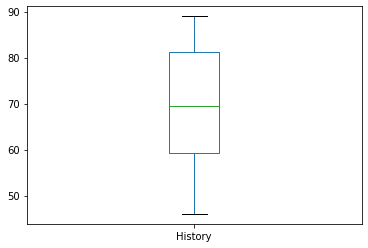

In [175]:
df['History'].plot.box()

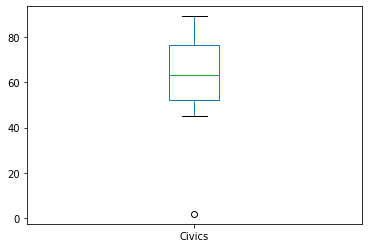

In [176]:
df['Civics'].plot.box()

In [177]:
di=df.iloc[:,3:-2]
di

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,55,45,56,87,21,52,89,65
1,75,96,78,64,90,61,58,2
2,25,54,89,76,95,87,56,74
3,78,96,86,63,54,89,75,45
4,58,96,78,46,96,77,83,53
5,45,87,52,89,55,89,87,52
6,55,64,61,58,75,58,64,61
7,54,76,87,56,25,56,76,87
8,55,63,89,75,78,75,63,89
9,96,46,77,83,58,83,46,77


In [178]:
collist=di.columns.values
ncol=8
nrows=10

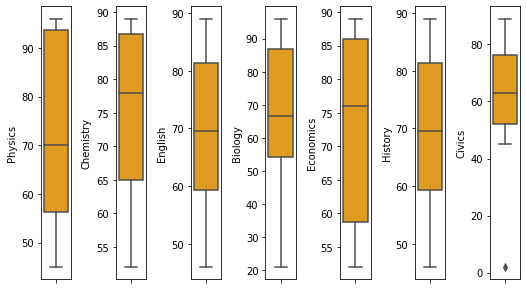

In [179]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(di[collist[i]],color='orange',orient='v')
    plt.tight_layout()

# TO CHECK DISTRIBUTION OF SKEWNESS

In [180]:
df.skew()

Gender       0.000000
Maths        0.246964
Physics     -0.045336
Chemistry   -0.746462
English     -0.131222
Biology     -0.496446
Economics   -0.245555
History     -0.131222
Civics      -1.332448
Total       -0.642123
Average     -0.642123
dtype: float64

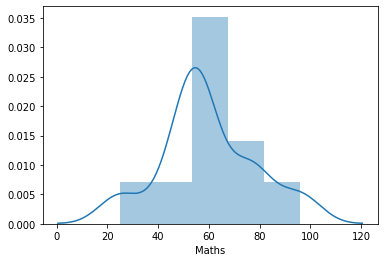

In [181]:
sns.distplot(df['Maths'])

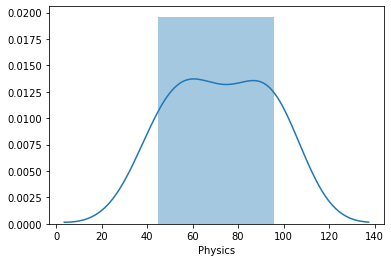

In [182]:
sns.distplot(df['Physics'])

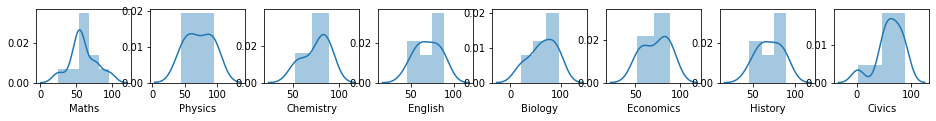

In [183]:
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(di[collist[i]])

# UNIVARIATE ANALYSIS

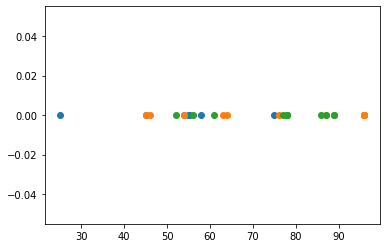

In [184]:
import numpy as np
plt.plot(df['Maths'],np.zeros_like(df['Maths']),'o')
plt.plot(df['Physics'],np.zeros_like(df['Physics']),'o')
plt.plot(df['Chemistry'],np.zeros_like(df['Chemistry']),'o')
plt.show()

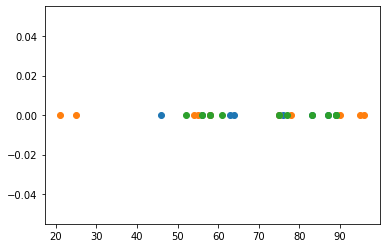

In [185]:
plt.plot(df['English'],np.zeros_like(df['English']),'o')
plt.plot(df['Biology'],np.zeros_like(df['Biology']),'o')
plt.plot(df['Economics'],np.zeros_like(df['Economics']),'o')
plt.show()

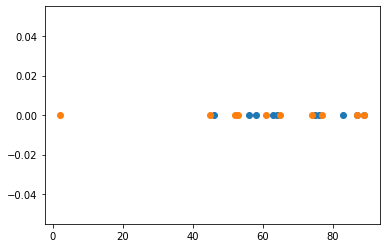

In [186]:
plt.plot(df['History'],np.zeros_like(df['History']),'o')
plt.plot(df['Civics'],np.zeros_like(df['Civics']),'o')
plt.show()

# BIVARIATE ANALYSIS

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


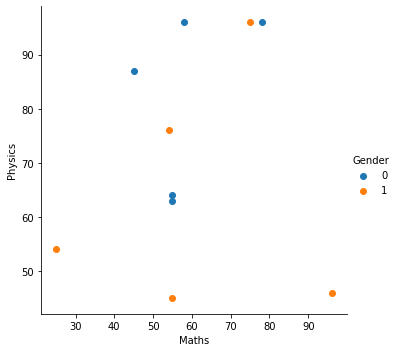

In [187]:
sns.FacetGrid(df,hue='Gender',size=5).map(plt.scatter,'Maths','Physics').add_legend();

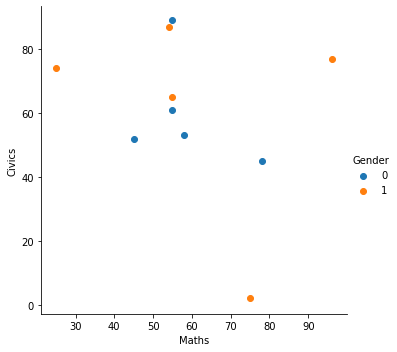

In [188]:
sns.FacetGrid(df,hue='Gender',size=5).map(plt.scatter,'Maths','Civics').add_legend();

AS YOU CAN SEE BIVARIATE ANALYSIS CAN BE DONE WITH TWO VARIANTS

# MULTIVARIATE ANALYSIS

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


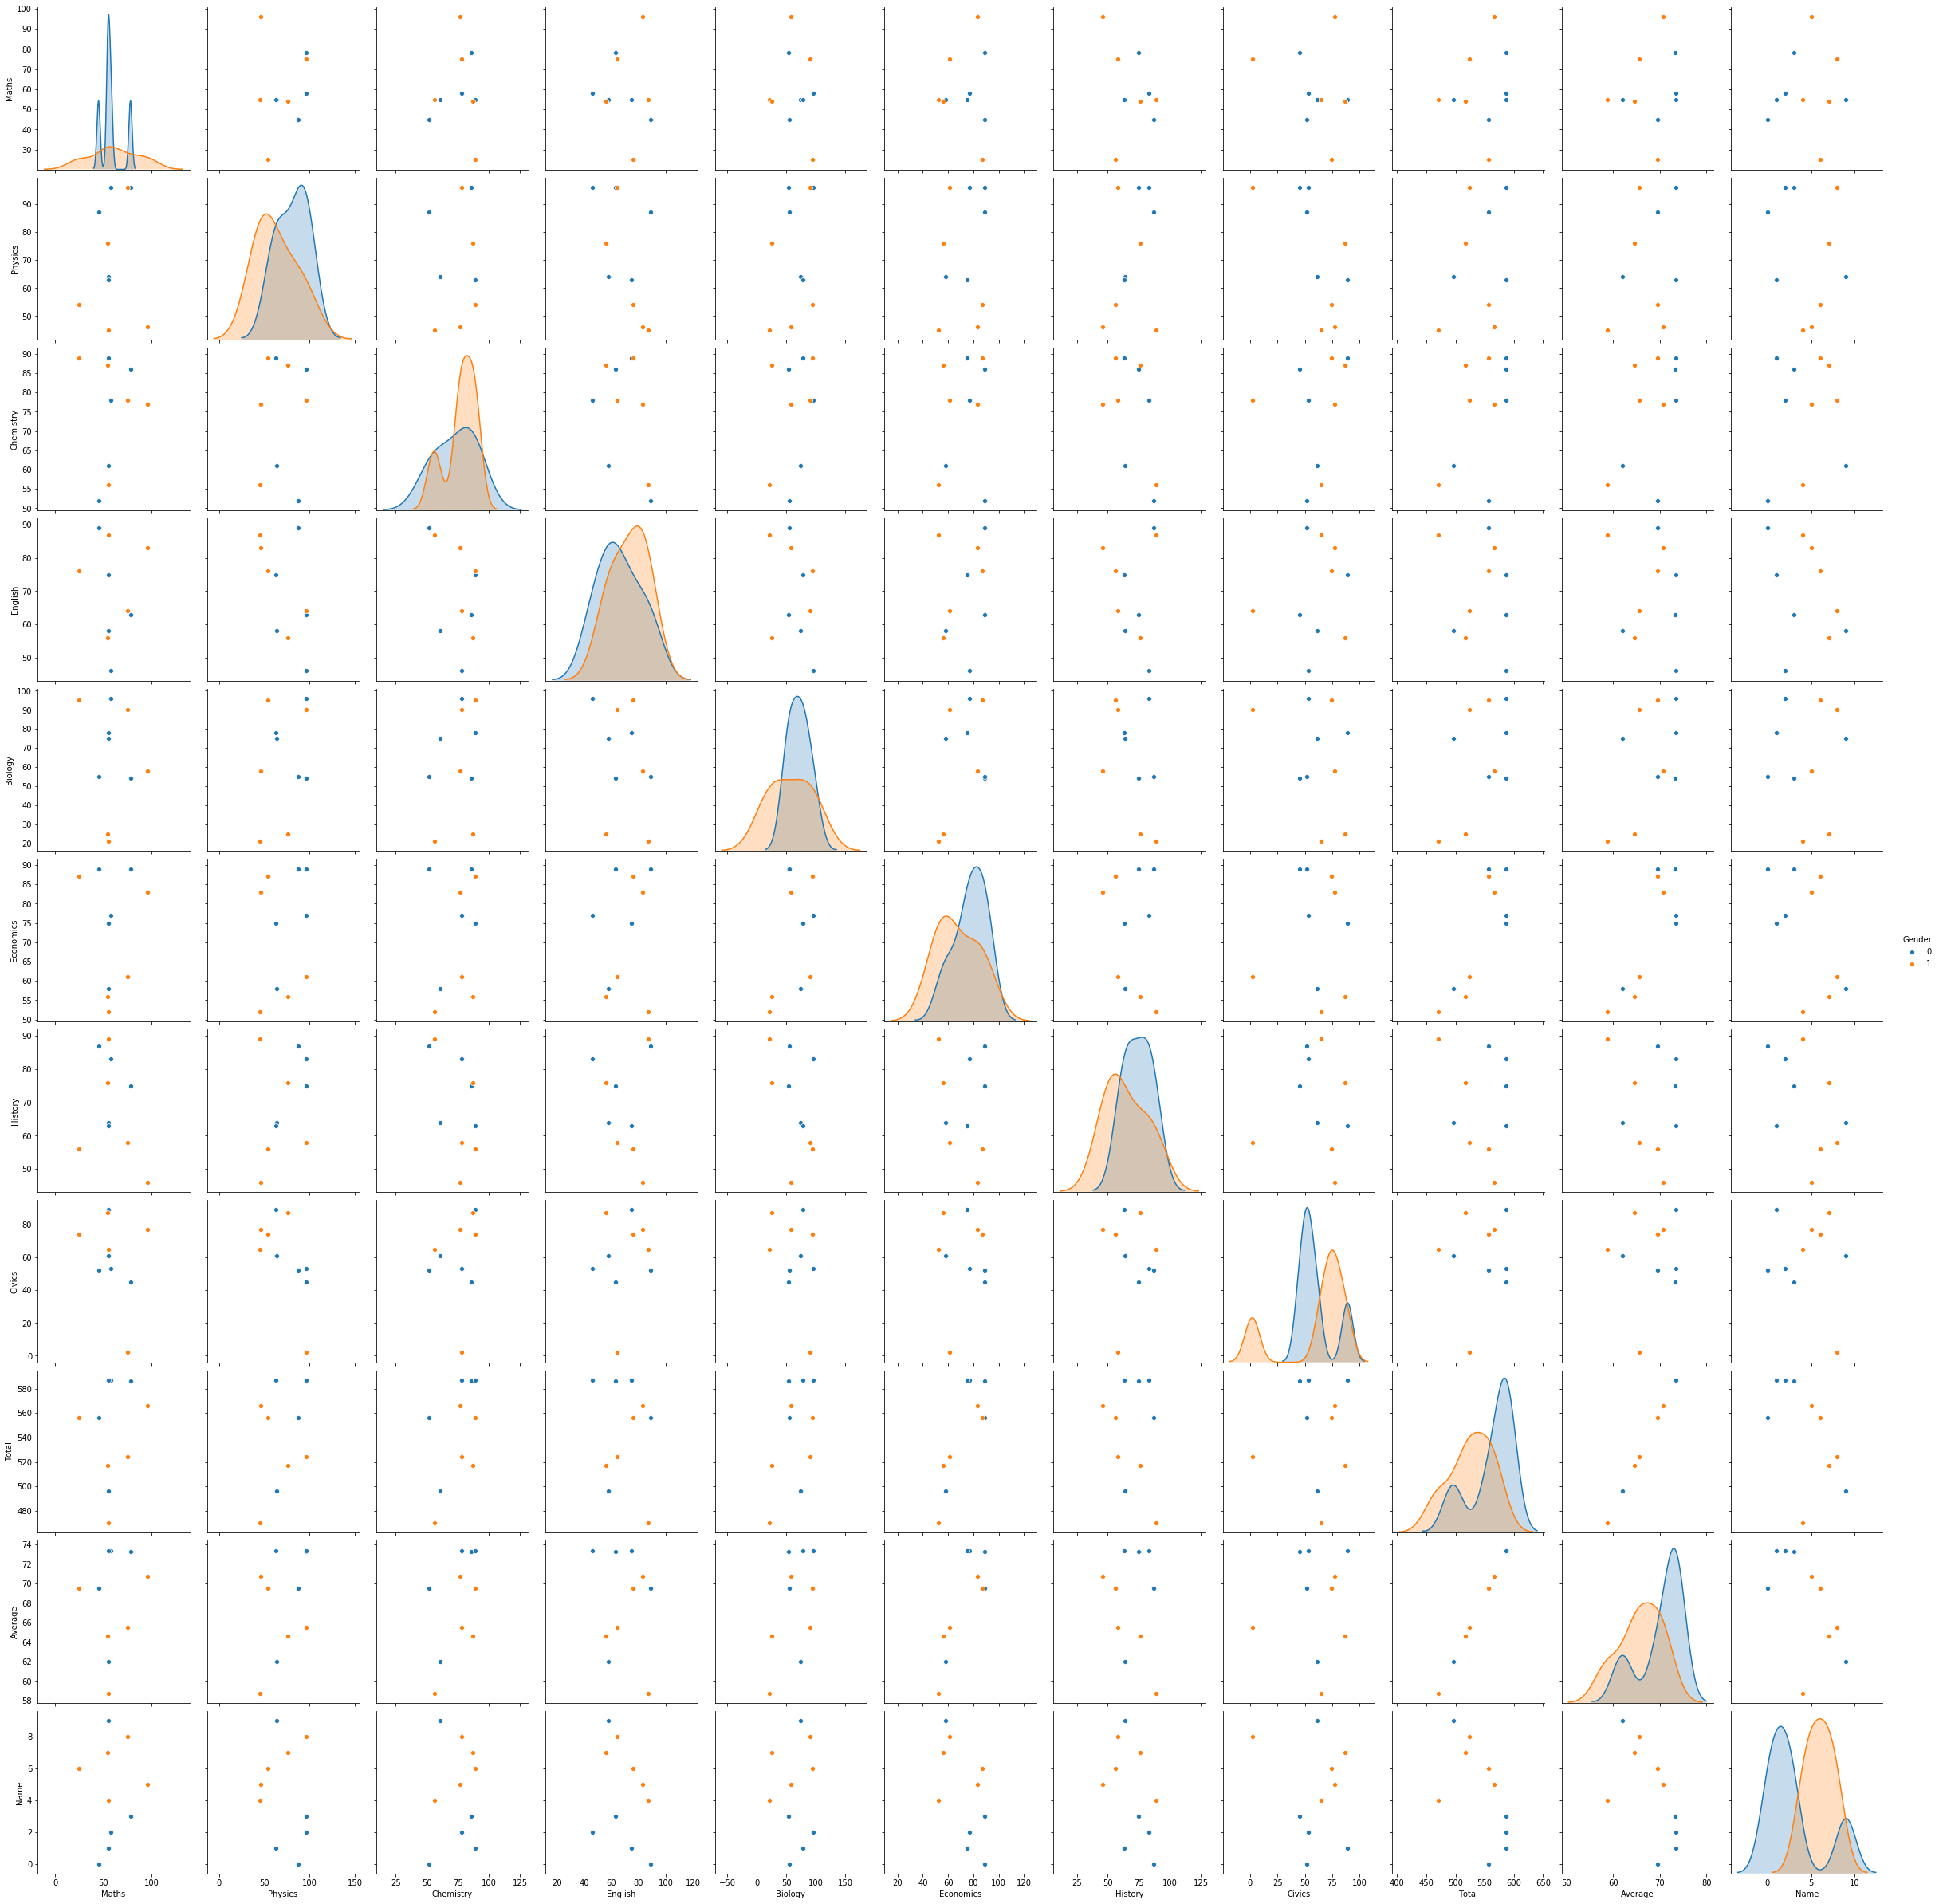

In [211]:
sns.pairplot(df,hue='Gender',size=3)

In [212]:
OBSERVATIONS
-> BY DOING MULTIVARIATE ANALYSIS BASED ON GENDER TYPE OF MALE AND FEMALE THE ORANGE COLOR SHOWS MALE WHERE AS BLUE IS FEMALE

SyntaxError: invalid syntax (<ipython-input-212-30767a312754>, line 2)

In [190]:
df.head()

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Total,Average
0,John,1,05-04-1988,55,45,56,87,21,52,89,65,470,58.750
1,Suresh,1,04-05-1987,75,96,78,64,90,61,58,2,524,65.500
2,Ramesh,1,25-05-1989,25,54,89,76,95,87,56,74,556,69.500
3,Jessica,0,12-08-1990,78,96,86,63,54,89,75,45,586,73.250
4,Jennifer,0,02-09-1989,58,96,78,46,96,77,83,53,587,73.375


In [191]:
df=df.drop(columns=['DOB'])
df

,Name,Gender,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Total,Average
0,John,1,55,45,56,87,21,52,89,65,470,58.750
1,Suresh,1,75,96,78,64,90,61,58,2,524,65.500
2,Ramesh,1,25,54,89,76,95,87,56,74,556,69.500
3,Jessica,0,78,96,86,63,54,89,75,45,586,73.250
4,Jennifer,0,58,96,78,46,96,77,83,53,587,73.375
5,Annu,0,45,87,52,89,55,89,87,52,556,69.500
6,pooja,0,55,64,61,58,75,58,64,61,496,62.000
7,Ritesh,1,54,76,87,56,25,56,76,87,517,64.625
8,Farha,0,55,63,89,75,78,75,63,89,587,73.375
9,Mukesh,1,96,46,77,83,58,83,46,77,566,70.750


In [195]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [196]:
label=le.fit_transform(df['Name'])

In [197]:
le.classes_

array(['Annu', 'Farha', 'Jennifer', 'Jessica', 'John', 'Mukesh', 'Ramesh',
       'Ritesh', 'Suresh', 'pooja'], dtype=object)

In [199]:
df=df.drop('Name',axis='columns')
df.head()

,Gender,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Total,Average
0,1,55,45,56,87,21,52,89,65,470,58.750
1,1,75,96,78,64,90,61,58,2,524,65.500
2,1,25,54,89,76,95,87,56,74,556,69.500
3,0,78,96,86,63,54,89,75,45,586,73.250
4,0,58,96,78,46,96,77,83,53,587,73.375


In [200]:
df['Name']=label

In [202]:
df

,Gender,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics,Total,Average,Name
0,1,55,45,56,87,21,52,89,65,470,58.750,4
1,1,75,96,78,64,90,61,58,2,524,65.500,8
2,1,25,54,89,76,95,87,56,74,556,69.500,6
3,0,78,96,86,63,54,89,75,45,586,73.250,3
4,0,58,96,78,46,96,77,83,53,587,73.375,2
5,0,45,87,52,89,55,89,87,52,556,69.500,0
6,0,55,64,61,58,75,58,64,61,496,62.000,9
7,1,54,76,87,56,25,56,76,87,517,64.625,7
8,0,55,63,89,75,78,75,63,89,587,73.375,1
9,1,96,46,77,83,58,83,46,77,566,70.750,5


In [203]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.        , 0.24916243, 1.39276651, 1.45310069, 1.26169862,
        1.70618534, 1.49152635, 1.40755973, 0.18716723, 1.91463575,
        1.91463575, 0.17407766],
       [1.        , 0.83415247, 1.20910499, 0.20328352, 0.41570417,
        0.98779152, 0.84303663, 0.85328751, 2.43317398, 0.52684608,
        0.52684608, 1.21854359],
       [1.        , 1.87413478, 0.93361271, 1.03147562, 0.4594625 ,
        1.18300723, 1.03037811, 0.99914862, 0.56150169, 0.2955478 ,
        0.2955478 , 0.52223297],
       [1.        , 0.99664971, 1.20910499, 0.80560505, 0.48863473,
        0.41776163, 1.17448693, 0.38653195, 0.64468712, 1.06654206,
        1.06654206, 0.52223297],
       [1.        , 0.08666519, 1.20910499, 0.20328352, 1.72845418,
        1.22205037, 0.30983398, 0.9699764 , 0.31194538, 1.09224187,
        1.09224187, 0.87038828],
       [1.        , 0.79081988, 0.7499512 , 1.75426145, 1.40755973,
        0.37871849, 1.17448693, 1.26169862, 0.3535381 , 0.2955478 ,
        0.2955478 ,

In [205]:
Threshold=3
print(np.where(z>2))

(array([1], dtype=int64), array([8], dtype=int64))


In [208]:
df_new=df[(z<2).all(axis=1)]
df_new.shape

(9, 12)

In [209]:
df.shape

(10, 12)

In [213]:
df_new=df
df.shape

(10, 12)

In [192]:
from joblib import dump,load
dump(df,'EDA_MYSQL_PROJECT.joblib')

['EDA_MYSQL_PROJECT.joblib']